In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
dataset_train.shape

(1258, 6)

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")

In [6]:
dataset_test.shape

(20, 6)

In [7]:
# extract and convert into 2D 
# just put bracket
training_set = dataset_train[['Open']]

In [8]:
training_set.shape

(1258, 1)

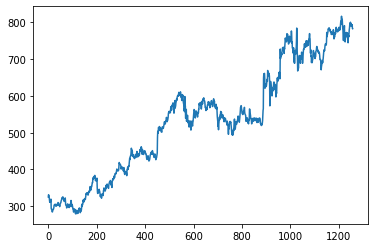

In [9]:
plt.plot(training_set)

In [10]:
real_stock_price = dataset_test[['Open']]

In [38]:
real_stock_price.shape

(20, 1)

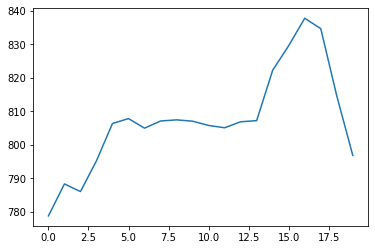

In [11]:
plt.plot(real_stock_price)

In [12]:
# We will have 60 records i.e. one month data(20 days a month) as one observation.


In [13]:
# Scale the data uniformly in a scale of 0 to 1

from sklearn.preprocessing import MinMaxScaler

In [14]:
normalizer = MinMaxScaler(feature_range=(0,1))

In [15]:
training_set_normalized = normalizer.fit_transform(training_set)

In [16]:
def prepareData(steps):
    X_train = []
    y_train = []
    for i in range(len(training_set_normalized) - steps):
        # access only the first column from 2D array.
        X_train.append(training_set_normalized[i:i+steps])
        y_train.append(training_set_normalized[i+steps])
    return np.array(X_train), np.array(y_train)

In [17]:
X_train, y_train = prepareData(60)

In [18]:
X_train.shape   

(1198, 60, 1)

In [19]:
y_train.shape

(1198, 1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
# Using LSTM for today's dataset
from keras.layers import LSTM

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [21]:
model = Sequential()

In [22]:
# Adding LSTM layer
# units of the layer will be 60 i.e. number  of steps because one obs goes to one neuron.
model.add(
    LSTM(
        units=60,
        input_shape=(60,1),
        return_sequences=True
    )
)

In [23]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'lstm_input'}},
  {'class_name': 'LSTM',
   'config': {'name': 'lstm',
    'trainable': True,
    'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 60,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'unit_forget_bias': True,
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activ

In [24]:
model.add(
    LSTM(
        units=60,
        input_shape=(60,1),
        return_sequences=True
    )
)
model.add(
    LSTM(
        units=60,
        input_shape=(60,1)
    )
)

In [25]:
model.add(
    Dense(
        units=1,
        activation='linear'
    )
)

In [26]:
model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

In [27]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
38/38 [==============================] - 56s 295ms/step - loss: 0.0758
Epoch 2/100
38/38 [==============================] - 11s 294ms/step - loss: 0.0021
Epoch 3/100
38/38 [==============================] - 9s 247ms/step - loss: 0.0019
Epoch 4/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0017
Epoch 5/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0015
Epoch 6/100
38/38 [==============================] - 9s 227ms/step - loss: 0.0014
Epoch 7/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0014
Epoch 8/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0015
Epoch 9/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0014
Epoch 10/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0015
Epoch 11/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0015
Epoch 12/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0014
Epoch 13/10

In [ ]:
loss = model.history.history["loss"]

In [33]:
pd1 = pd.DataFrame(loss)

<AxesSubplot:>

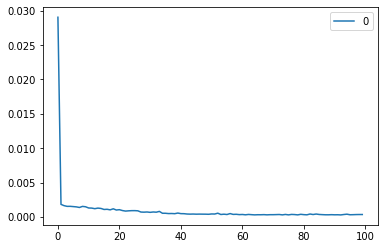

In [34]:
pd1.plot()

In [46]:
testing_set_normalized = normalizer.fit_transform(real_stock_price)[:, 0]

In [51]:
testing_set_normalized

array([[0.        ],
       [0.16186441],
       [0.12322034],
       [0.27881356],
       [0.46762712],
       [0.49237288],
       [0.44389831],
       [0.48016949],
       [0.4859322 ],
       [0.47915254],
       [0.45762712],
       [0.4459322 ],
       [0.47627119],
       [0.4820339 ],
       [0.73711864],
       [0.86118644],
       [1.        ],
       [0.94745763],
       [0.60762712],
       [0.3059322 ]])

In [49]:
real_stock_price

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40
5,807.86
6,805.00
7,807.14
8,807.48
9,807.08


In [48]:
predicted =  model.predict(testing_set_normalized)

ValueError: in user code:

    /home/prateek/.local/lib/python3.9/site-packages/keras/engine/training.py:1544 predict_function  *
        return step_function(self, iterator)
    /home/prateek/.local/lib/python3.9/site-packages/keras/engine/training.py:1527 run_step  *
        outputs = model.predict_step(data)
    /home/prateek/.local/lib/python3.9/site-packages/keras/engine/training.py:1500 predict_step  *
        return self(x, training=False)
    /home/prateek/.local/lib/python3.9/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/prateek/.local/lib/python3.9/site-packages/keras/engine/input_spec.py:212 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, None)


In [ ]:
# convert to the original scale
train_pred = normalizer.inverse_transform(train_pred)